In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from collections import Counter

In [4]:
df = pd.read_csv('student-por.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df = pd.read_csv('student-por.csv')

df = pd.get_dummies(df, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  G1                 649 non-null    int64
 14  G2                 649 non-null    int64
 15  G3                 649 non-null    int64
 16  school_MS          649 non-null    bool 
 17  sex_M           

In [6]:
X = df.drop('G3', axis=1)
y = df['G3']

print('Original dataset shape %s' % Counter(y))

X_filtered = X[~y.isin([1, 5, 19, 6])]
y_filtered = y[~y.isin([1, 5, 19, 6])]

print(Counter(y_filtered))

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_res, y_res = smote.fit_resample(X_filtered, y_filtered)

print('Resampled dataset shape %s' % Counter(y_res))

resampled_df = pd.DataFrame(X_res, columns=X.columns)
resampled_df['G3'] = y_res

resampled_df.to_csv('student-por-extended.csv', index=False)

Original dataset shape Counter({11: 104, 10: 97, 13: 82, 12: 72, 14: 63, 15: 49, 16: 36, 9: 35, 8: 35, 17: 29, 18: 15, 0: 15, 7: 10, 6: 3, 19: 2, 1: 1, 5: 1})
Counter({11: 104, 10: 97, 13: 82, 12: 72, 14: 63, 15: 49, 16: 36, 9: 35, 8: 35, 17: 29, 18: 15, 0: 15, 7: 10})
Resampled dataset shape Counter({11: 104, 12: 104, 14: 104, 13: 104, 17: 104, 15: 104, 7: 104, 10: 104, 16: 104, 9: 104, 8: 104, 18: 104, 0: 104})


In [7]:
df = pd.read_csv('student-por-extended.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                1352 non-null   int64
 1   Medu               1352 non-null   int64
 2   Fedu               1352 non-null   int64
 3   traveltime         1352 non-null   int64
 4   studytime          1352 non-null   int64
 5   failures           1352 non-null   int64
 6   famrel             1352 non-null   int64
 7   freetime           1352 non-null   int64
 8   goout              1352 non-null   int64
 9   Dalc               1352 non-null   int64
 10  Walc               1352 non-null   int64
 11  health             1352 non-null   int64
 12  absences           1352 non-null   int64
 13  G1                 1352 non-null   int64
 14  G2                 1352 non-null   int64
 15  school_MS          1352 non-null   bool 
 16  sex_M              1352 non-null   bool 
 17  address_U     

In [8]:
correlation_matrix = df.corr()

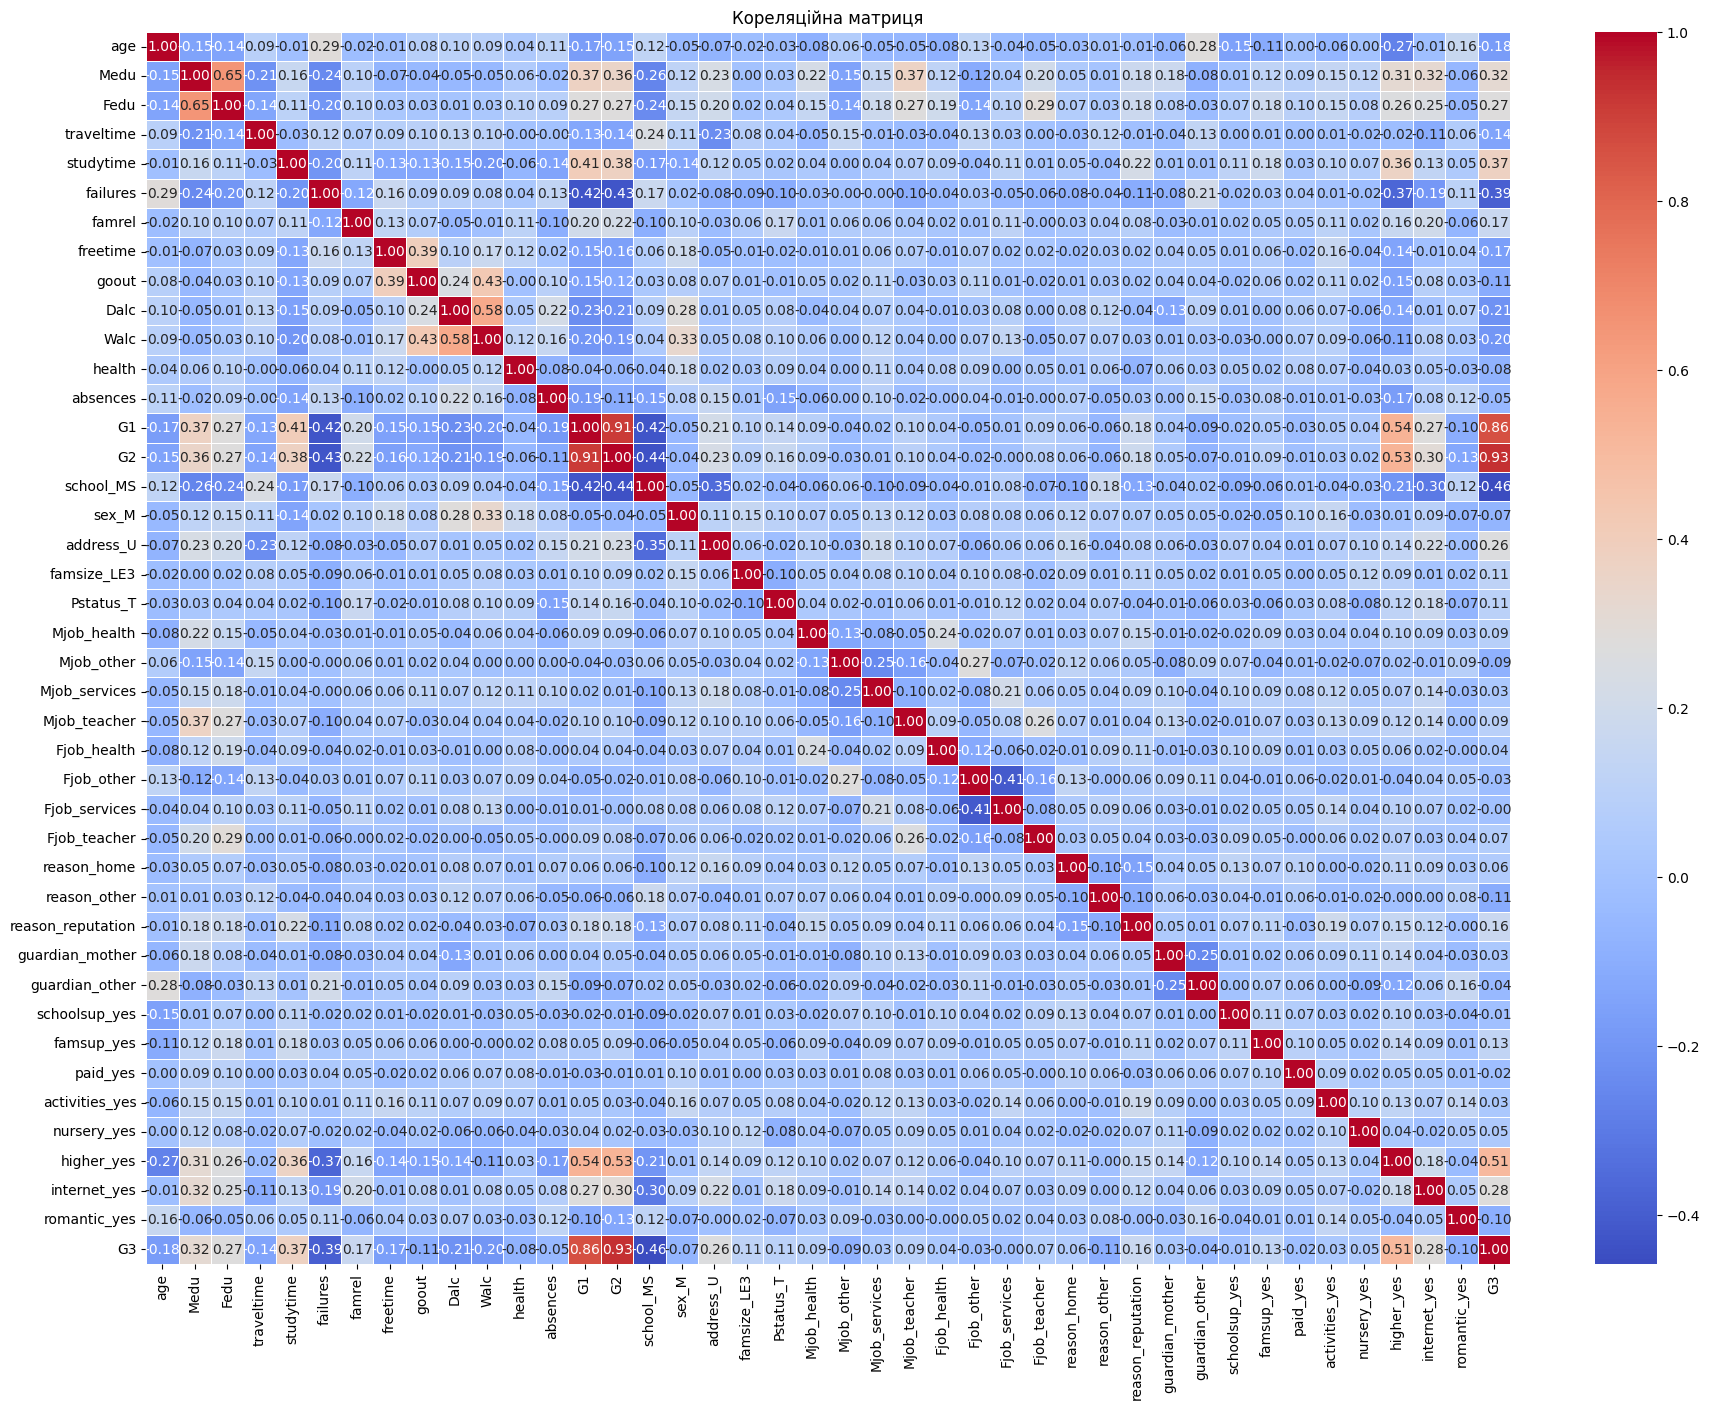

In [9]:
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Кореляційна матриця")
plt.show()

In [10]:
correlation_sums = correlation_matrix.abs().sum(axis=1)

top_features = correlation_sums.sort_values(ascending=False).head(10).index

print("Топ характеристики за кореляцією:", top_features)

Топ характеристики за кореляцією: Index(['G1', 'G2', 'G3', 'Medu', 'higher_yes', 'Fedu', 'school_MS', 'failures',
       'studytime', 'internet_yes'],
      dtype='object')


In [11]:
selected_features = ['G1', 'G2', 'G3', 'Medu', 'higher_yes', 'Fedu', 'failures', 'studytime', 'internet_yes']
df_selected = df[selected_features]

df_selected.to_csv('selected_features_dataset.csv', index=False)

In [12]:
df = pd.read_csv('selected_features_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   G1            1352 non-null   int64
 1   G2            1352 non-null   int64
 2   G3            1352 non-null   int64
 3   Medu          1352 non-null   int64
 4   higher_yes    1352 non-null   bool 
 5   Fedu          1352 non-null   int64
 6   failures      1352 non-null   int64
 7   studytime     1352 non-null   int64
 8   internet_yes  1352 non-null   bool 
dtypes: bool(2), int64(7)
memory usage: 76.7 KB


In [13]:
df.head()

,G1,G2,G3,Medu,higher_yes,Fedu,failures,studytime,internet_yes
0,0,11,11,4,True,4,0,2,False
1,9,11,11,1,True,1,0,2,True
2,12,13,12,1,True,1,0,2,True
3,14,14,14,4,True,2,0,3,True
4,11,13,13,3,True,3,0,2,False


In [14]:
df.isnull().sum()

,0
G1,0
G2,0
G3,0
Medu,0
higher_yes,0
Fedu,0
failures,0
studytime,0
internet_yes,0


In [15]:
df.describe()

,G1,G2,G3,Medu,Fedu,failures,studytime
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,11.167899,11.288462,11.538462,2.354290,2.051775,0.233728,1.765533
std,3.500966,4.013071,4.702237,1.112241,1.030395,0.555000,0.765984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,1.000000
50%,11.000000,12.000000,12.000000,2.000000,2.000000,0.000000,2.000000
75%,14.000000,14.000000,15.000000,3.000000,3.000000,0.000000,2.000000
max,19.000000,18.000000,18.000000,4.000000,4.000000,3.000000,4.000000


In [16]:
df.dtypes

,0
G1,int64
G2,int64
G3,int64
Medu,int64
higher_yes,bool
Fedu,int64
failures,int64
studytime,int64
internet_yes,bool


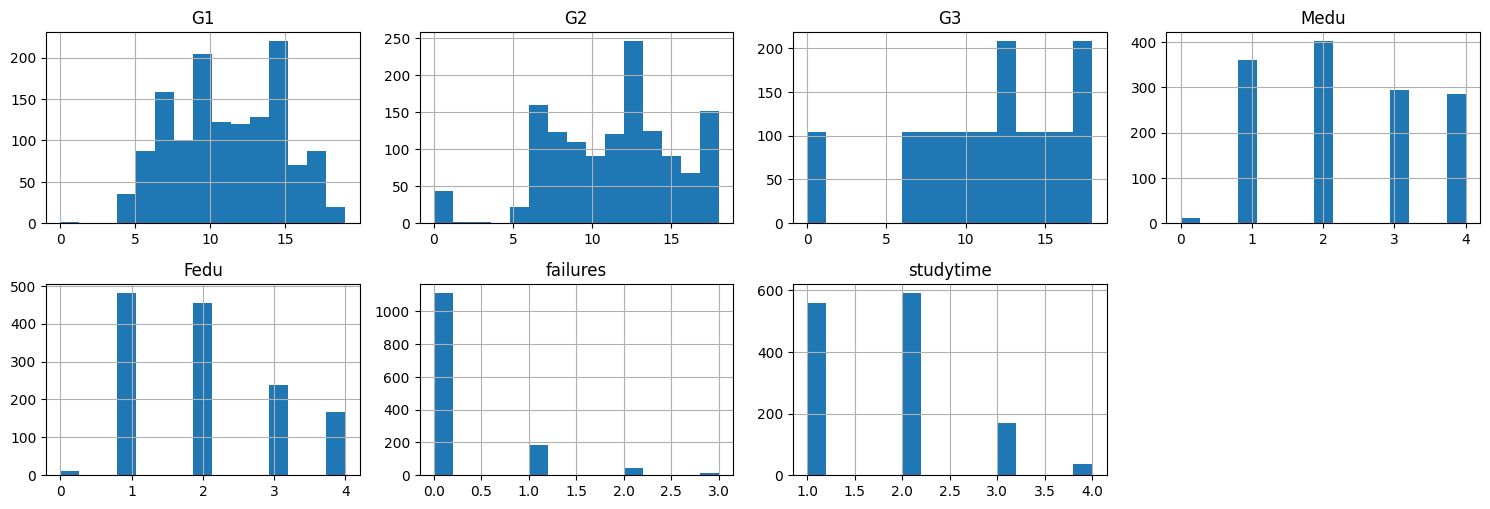

In [17]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

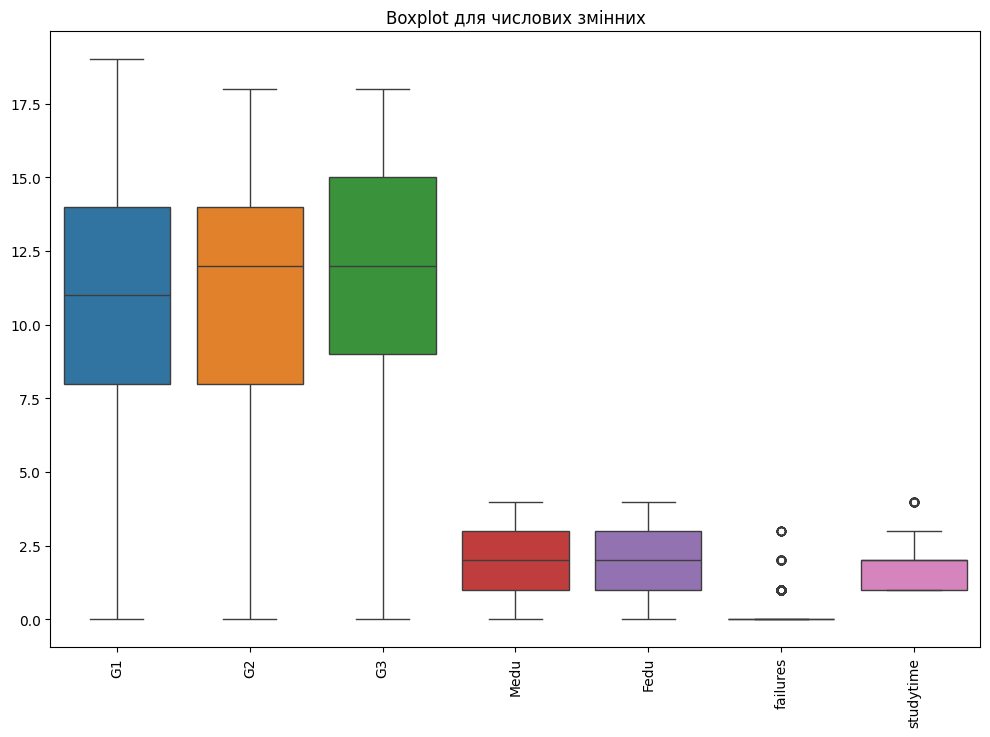

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot для числових змінних')
plt.xticks(rotation=90)
plt.show()

In [19]:
X = df.drop(columns=['G3'])
y = df['G3']

In [20]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
variance_selector = VarianceThreshold(threshold=0.01)

original_columns = X.columns

preprocessor = ColumnTransformer(
    transformers=[
        ("variance", variance_selector, num_features),
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)
print(X.shape)

(1352, 16)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1081, 16) (271, 16)


In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
def plot_actual_vs_fitted(y_actual, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6, color='b', edgecolor=None)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.title(f"{model_name} - Actual vs Fitted Values", fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Fitted Values", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

In [28]:
def plot_metric_comparison(model_list, mae_list, rmse_list, r2_list):
    results_df = pd.DataFrame({
        'Model Name': model_list,
        'MAE': mae_list,
        'RMSE': rmse_list,
        'R2': r2_list
    })

    results_long = results_df.melt(id_vars="Model Name", var_name="Metric", value_name="Score")

    plt.figure(figsize=(12, 8))
    sns.barplot(x="Score", y="Model Name", hue="Metric", data=results_long, palette="coolwarm")
    plt.title("Comparison of Metrics for Different Models", fontsize=14)
    plt.xlabel("Score", fontsize=12)
    plt.ylabel("Model Name", fontsize=12)
    plt.legend(title="Metric", loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.6780
- Mean Absolute Error: 1.0194
- R2 Score: 0.8711
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5945
- Mean Absolute Error: 1.0350
- R2 Score: 0.8899




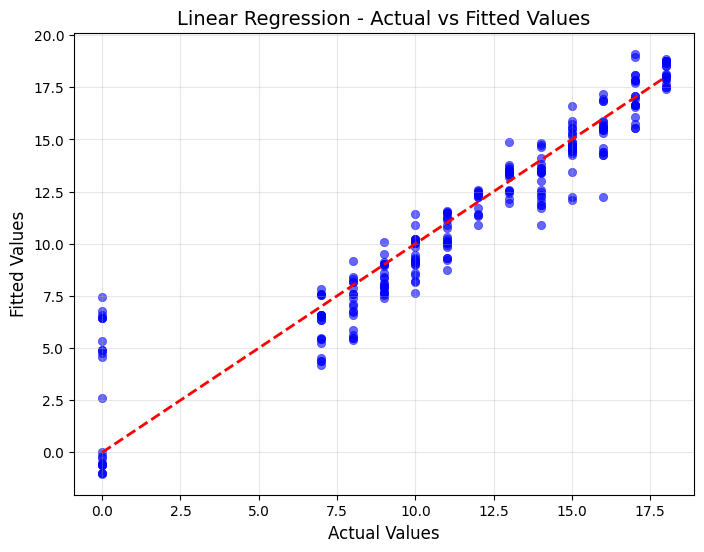

Lasso
Model performance for Training set
- Root Mean Squared Error: 1.7165
- Mean Absolute Error: 0.9886
- R2 Score: 0.8651
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.6124
- Mean Absolute Error: 0.9892
- R2 Score: 0.8874




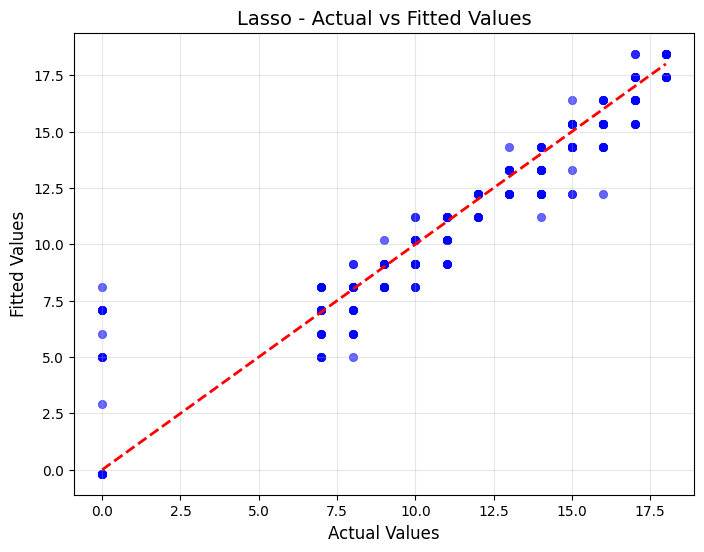

Ridge
Model performance for Training set
- Root Mean Squared Error: 1.6780
- Mean Absolute Error: 1.0193
- R2 Score: 0.8711
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5945
- Mean Absolute Error: 1.0349
- R2 Score: 0.8899




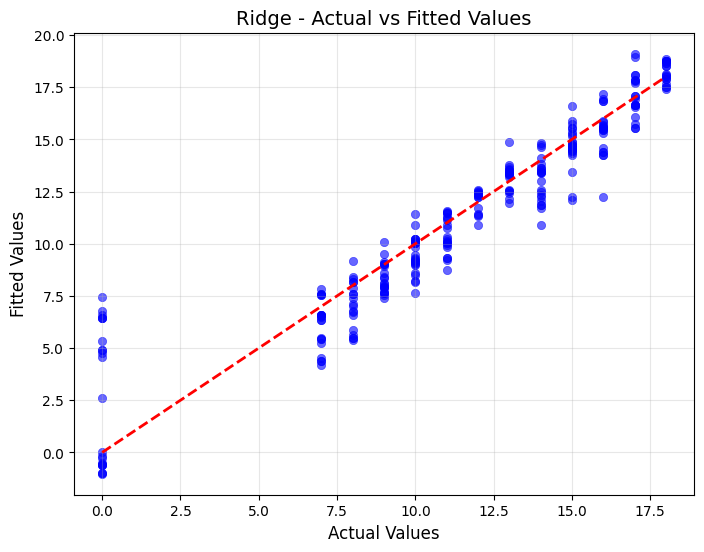

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.4634
- Mean Absolute Error: 0.1246
- R2 Score: 0.9902
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4642
- Mean Absolute Error: 0.6666
- R2 Score: 0.9072




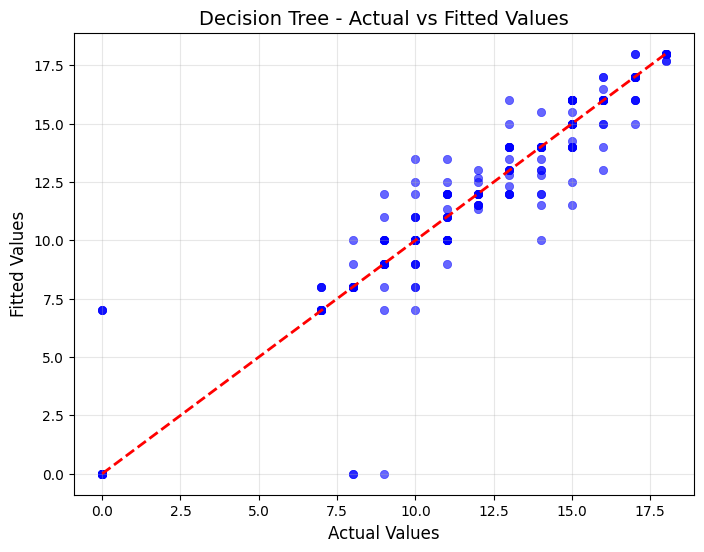

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6252
- Mean Absolute Error: 0.3126
- R2 Score: 0.9821
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1157
- Mean Absolute Error: 0.6578
- R2 Score: 0.9461




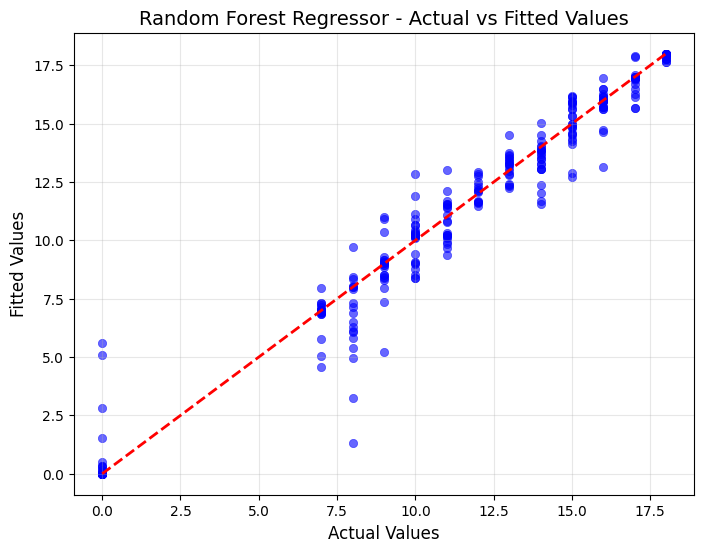

XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.5430
- Mean Absolute Error: 0.2800
- R2 Score: 0.9865
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1516
- Mean Absolute Error: 0.6556
- R2 Score: 0.9426




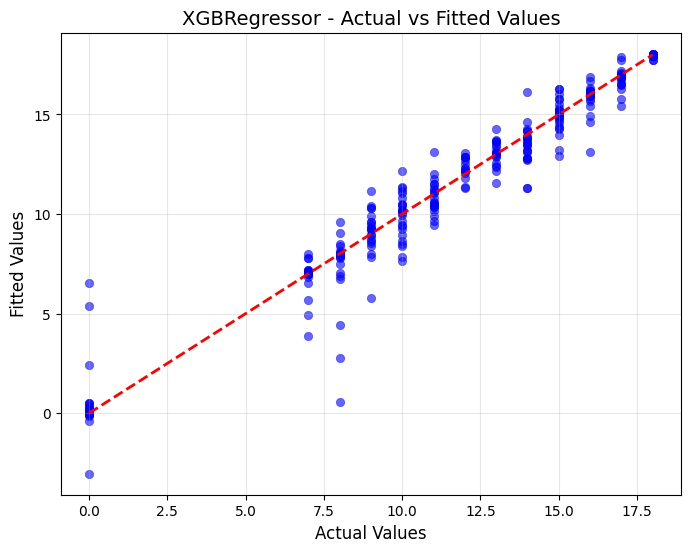

AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 1.6565
- Mean Absolute Error: 1.1347
- R2 Score: 0.8744
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.6413
- Mean Absolute Error: 1.1236
- R2 Score: 0.8833




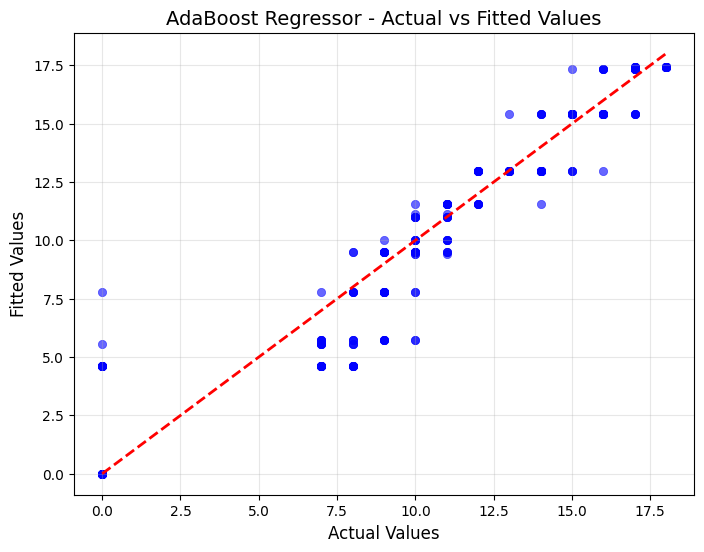

                Model Name  R2_Score
4  Random Forest Regressor  0.946083
5             XGBRegressor  0.942564
3            Decision Tree  0.907152
2                    Ridge  0.889880
0        Linear Regression  0.889879
1                    Lasso  0.887392
6       AdaBoost Regressor  0.883321


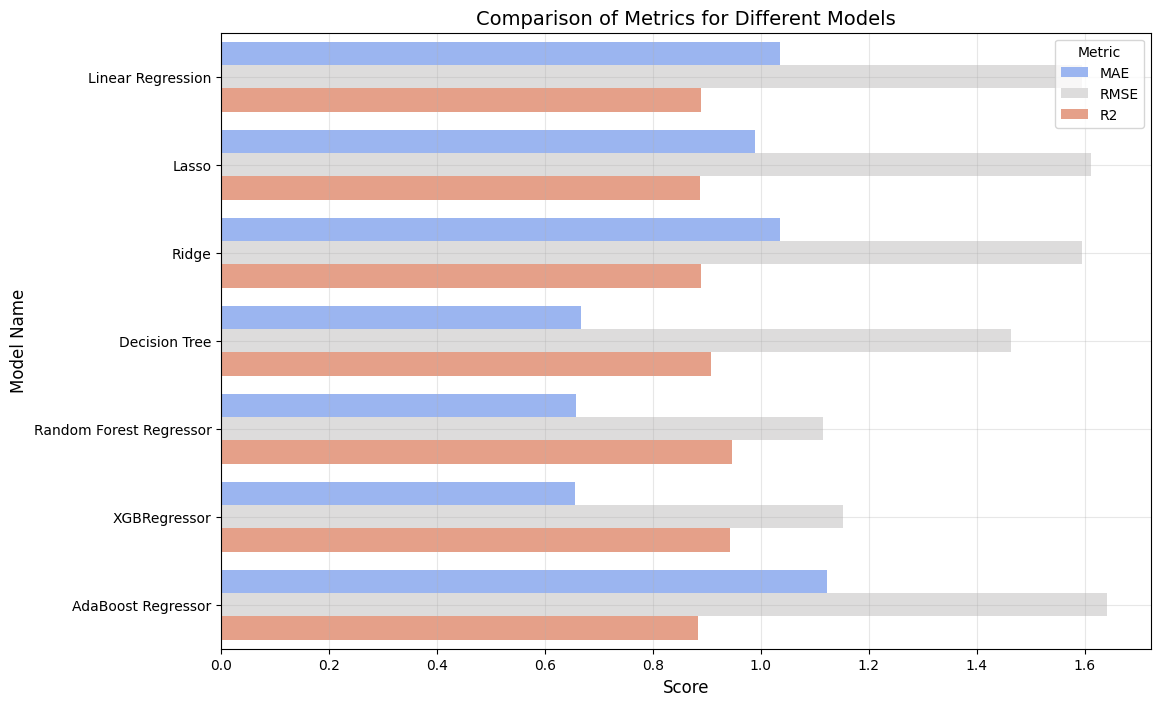

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []
rmse_list = []
mae_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"{name}")
    model_list.append(name)

    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('----------------------------------')

    print("Model performance for Test set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")

    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)

    print("="*35)
    print('\n')

    plot_actual_vs_fitted(y_test, y_test_pred, name)

results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
print(results_df.sort_values(by="R2_Score", ascending=False))

plot_metric_comparison(model_list, mae_list, rmse_list, r2_list)


